In [1]:
%pip install qiskit
%pip install pylatexenc
%pip install qiskit_aer

  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/8f/05/07f88a388b73820d80cbe259ebe21ec1b3111f2d699929abf9fa1cca1d21/qiskit-1.0.2-cp38-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for rustworkx>=0.14.0 from https://files.pythonhosted.org/packages/6a/79/d6a50d6f638b938fbd94793933f34add9e3fbd83ebbfcd7f90d4e2d493d0/rustworkx-0.14.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for stevedore>=3.0.0 from https://files.pythonhosted.org/packages/eb/f1/c7c6205c367c764ee173537f7eaf070bba4dd0fa11bf081813c2f75285a3/stevedore-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for symengine>=0.11 from https://files.pythonhosted.org/packages/37/13/721605e2a365a2f13dcd1e52ea9e5e2c2167da3cc0479a244fb2a983d77d/symengine-0.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pbr!=2.1.0,>=2.0.0 from https://files.pythonhosted.org/packages/64/dd/171c9fb653591

In [5]:
import numpy as np

# qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

## The AerSimulator

In [4]:
Simulator = AerSimulator()

print("Available Methods: ", Simulator.available_methods())
print("Available Devices: ", Simulator.available_devices())

Available Methods:  ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')
Available Devices:  ('CPU',)


## Simulating a Quantum Circuit
The basic operation runs a quantum circuit and returns a counts dictionary of measurement outcomes.

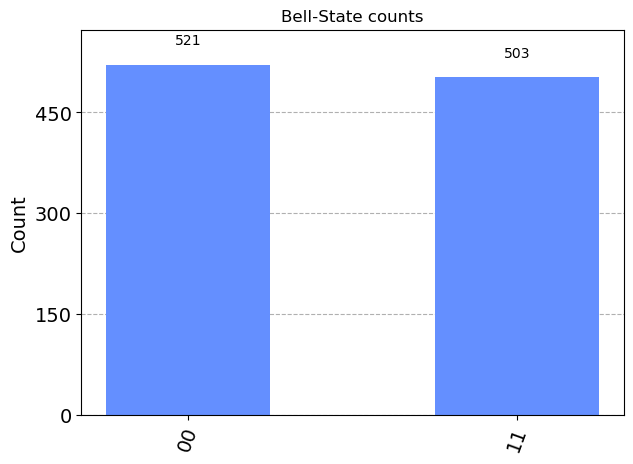

In [6]:
# circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

## Returning measurement outcomes for each shot

In [7]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '00', '11', '00', '11', '11', '00', '11']


## Simulation Method
The AerSimulator supports a variety of simulation methods, each of which supports a different set of instructions. The method can be set manually using simulator(method=value) option, or a simulator backend with a preconfigured method can be obtained directly from the AerSimulator

When simulating ideal circuits, changing the method between the exact simulation methods stabilizer, statevector, density_matrix and matrix_product_state should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

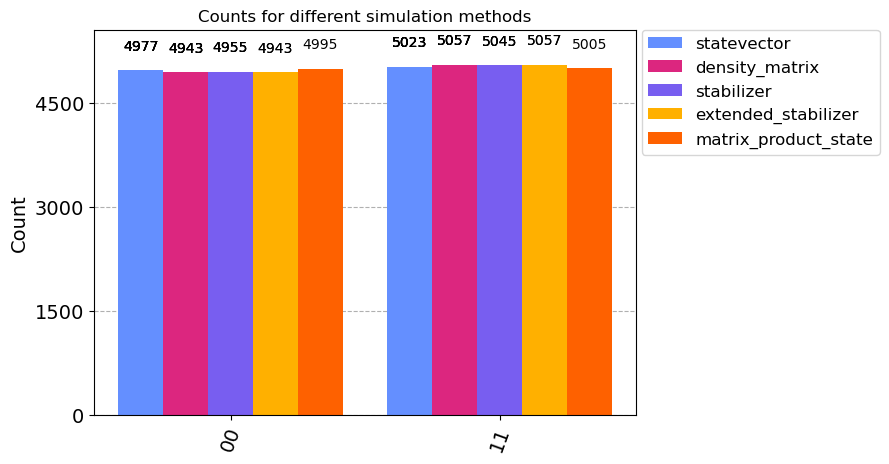

In [8]:
# Increase shots to reduce sampling variance
shots = 10000

# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

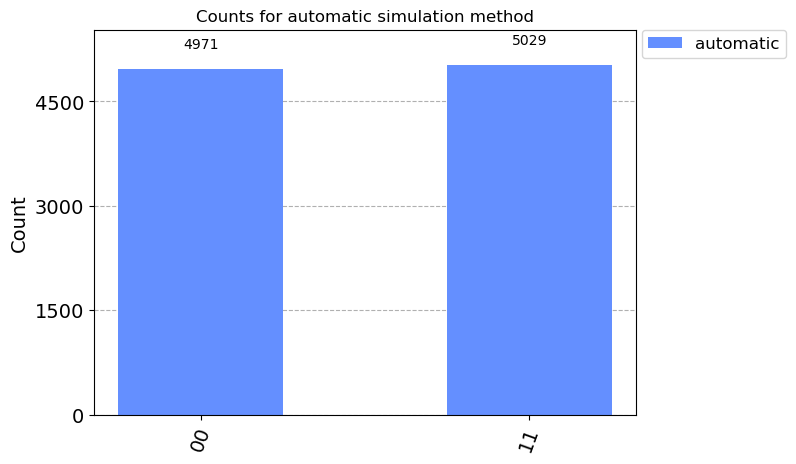

In [9]:
# automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

## Simulation Precision

One of the available simulator options allows setting the float precision for the statevector, density_matrix, unitary and superop methods. This is done using the set_precision="single" or precision="double" (default) option:

In [10]:
simulator = AerSimulator(method='statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'00': 528, '11': 496}


## Saving the final statevector

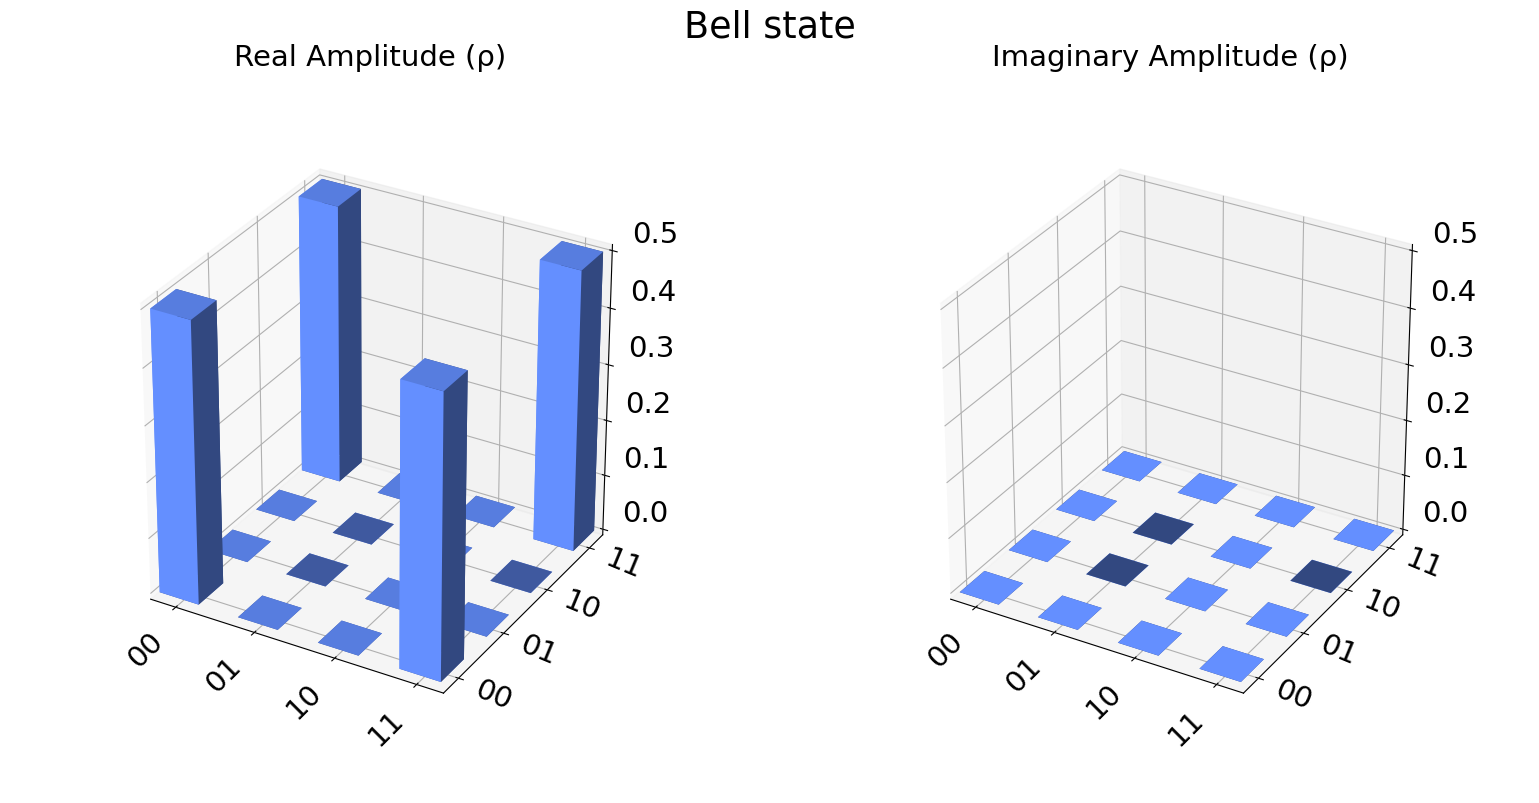

In [11]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

## Saving the circuit unitary

In [12]:
# quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]
